In [1]:
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
import os
import numpy as np
import matplotlib.pyplot as plt


# Keras partial weight loading info:
# https://stackoverflow.com/questions/43702323/how-to-load-only-specific-weights-on-keras

ct_folder = 'nocancer'
cancer_folder = 'cancer'

In [3]:
# https://luna16.grand-challenge.org/Data/
ct_dataset = os.listdir(ct_folder)
cancer_dataset = os.listdir(cancer_folder)

In [4]:
ct_set = set(ct_dataset) # get set of all ct images
malignant_set = set(cancer_dataset) # get ct images containing cancer (call it malignant)
benign_set = ct_set - malignant_set # make list of benign nodules

# check all correct
print("All scans count: {}, malignant: {}, union: {}, intersection: {}".format(
      len(ct_set), len(malignant_set), len(ct_set | malignant_set), len(ct_set & malignant_set)))

All scans count: 25236, malignant: 8356, union: 33592, intersection: 0


In [7]:
# load data 
data_x = np.ndarray((0,16,16,16))
data_y = np.ndarray((0, 1))
handicap = 200
for benign in benign_set: #go through benign examples
    valarr = benign.split('_')
    if (valarr[1] == "img"):
        data = np.load(os.path.join(ct_folder, benign))
        data_x = np.append(data_x, [data], axis = 0)
        data_y = np.append(data_y, [0]) # no cancer
        
        handicap -= 1
        if handicap == 0:
            break
        

handicap = 200
for malignant in malignant_set: #go through malignant examples
    valarr = malignant.split('_')
    if (valarr[1] == "img"):
        data = np.load(os.path.join(cancer_folder, malignant))
        data_x = np.append(data_x, [data], axis = 0)
        data_y = np.append(data_y, [1]) # presented cancer
        
        handicap -= 1
        if handicap == 0:
            break
        


In [8]:
#overall: 4855 images
N = data_y.shape[0]
# benign count
Nb = np.sum(data_y == 0)
# malignant count
Nm = np.sum(data_y == 1)
print("{} benign, {} malignant, {} overall".format(Nb, Nm, N))

200 benign, 200 malignant, 400 overall


In [9]:
# plotting function:
# https://www.kaggle.com/arnavkj95/candidate-generation-and-luna16-preprocessing


import matplotlib.pyplot as plt
from skimage import measure, feature
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 4), 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 4):
        for j in range (0, scan.shape[0], 4):
            plots[int(i / 4), int(j / 4)].axis('off')
            plots[int(i / 4), int(j / 4)].imshow(scan[i + int(j/4)], cmap=plt.cm.bone) 

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

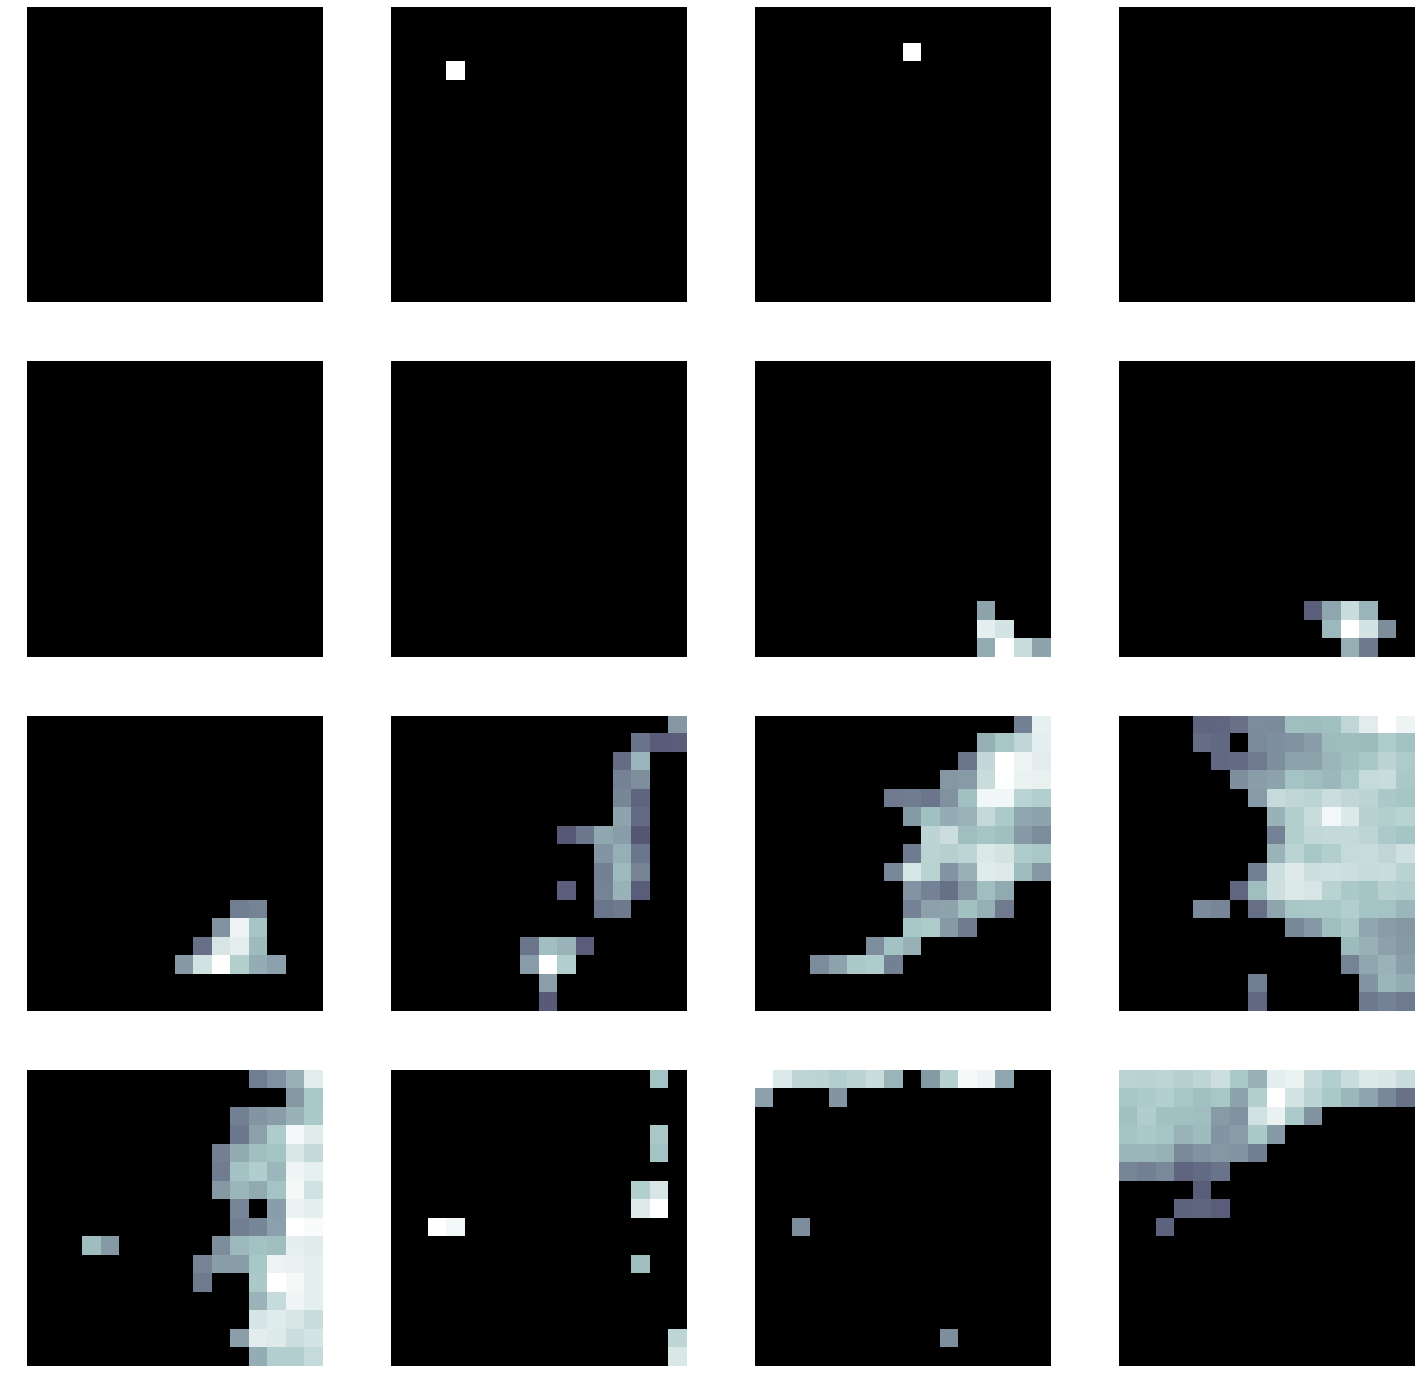

In [10]:
plot_ct_scan(data)

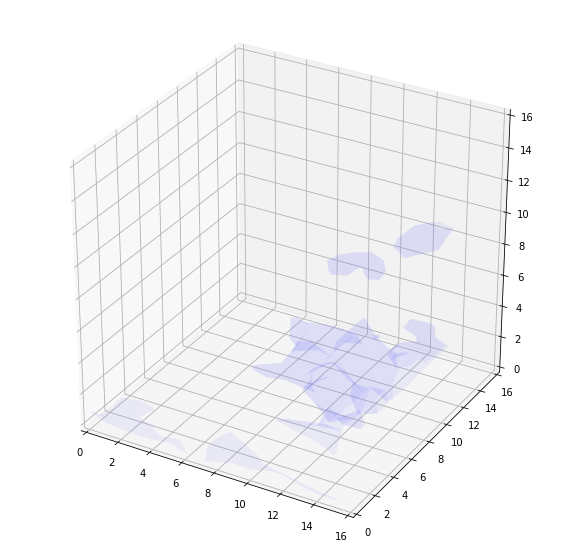

In [11]:
plot_3d(data, 0)

In [7]:
training_folder = "Models/11"
train_malignant = np.load(os.path.join(training_folder, "train_malignant.npy"))
train_benign = np.load(os.path.join(training_folder, "train_benign.npy"))
validation_malignant = np.load(os.path.join(training_folder, "validation_malignant.npy"))
validation_benign = np.load(os.path.join(training_folder, "validation_benign.npy"))

In [18]:
train_benign

array(['179162671133894061547290922949_img_230.npy',
       '287966244644280690737019247886_img_273.npy',
       '832260670372728970918746541371_img_324.npy',
       '150684298696437181894923266019_img_498.npy',
       '670107649586205629860363487713_img_349.npy',
       '143622857676008763729469324839_img_4066.npy',
       '323302986710576400812869264321_img_168.npy',
       '259123825760999546551970425757_img_1773.npy',
       '534006575256943390479252771547_img_18.npy',
       '768276876111112560631432843476_img_695.npy',
       '162845309248822193437735868939_img_46.npy',
       '338114620394879648539943280992_img_775.npy',
       '194632613233275988184244485809_img_1059.npy',
       '877026508860018521147620598474_img_3762.npy',
       '265453131727473342790950829556_img_167.npy',
       '312127933722985204808706697221_img_1256.npy',
       '826812708000318290301835871780_img_169.npy',
       '329404588567903628160652715124_img_839.npy',
       '144883090372691745980459537053_img_

In [15]:

for nodule in validation_benign: #go through benign examples
    valarr = nodule.split('_')
    if (valarr[1] == "img"):
        print('True')

True
True
True
True
True
True
True
